# Volume 4: River Crossing
    <Name>
    <Class>
    <Date>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate
from numpy import linalg as la
from scipy.optimize import root
import scipy.integrate as integrate

# Problem 1
Assume that the current is given by $c(x) = −
\frac{7}{10} (x^2 − 1)$. (This function assumes, for example, that the current is faster near the center of the river.) Write a Python
function that accepts as arguments a function $y$, its derivative $y'$, and an $x$-value, and returns $L(x, y(x), y'(x))$ (where $T[y]=\int^1_{-1} L(x,y(x),y'(x))dx$ Use that function to defune a second
function that numerically computes $T[y]$ for a given path $y(x)$.

In [2]:
# Define the current function
def c(x):
    return (-7/10) * (x**2 -1)

# Define L(x,y, y_prime)
def L(x,y,y_prime):
    alpha = (1-c(x)**2)**(-1/2)
    left_side = alpha * np.sqrt(1 + (alpha*y_prime(x))**2)
    right_side = -alpha**2 * c(x) * y_prime(x)
    return left_side + right_side

# Define the T function
def T(y,y_prime):
    result, _ = integrate.quad(lambda x: L(x,y,y_prime),-1, 1)
    return result

# Problem 2

Let y(x) be the straight-line path between A = (−1, 0) and B = (1, 5). Numerically calculate T[y] to get an upper bound on the minimum time required to cross from A to
B. Using (18.2), find a lower bound on the minimum time required to cross.

In [19]:
# Define the min_time function
def min_time():
    result, _ = integrate.quad(lambda x: 1,-1,1)
    return result

def y(x):
    return (5/2) * x + (5/2)

def y_prime(x):
    return 5/2

      
print('Max Bound')
print(T(y, y_prime))

print('Min Bound')
print(min_time())

Max Bound
3.8770820491384126
Min Bound
2.0


In [36]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D[::-1,::-1], x[::-1]

# Problem 3

Numerically solve the Euler-Lagrange equation (18.4), using c(x) = −
7
10 (x
2 − 1)
and α = (1 − c
2
)
−1/2
, and y(−1) = 0, y(1) = 5.
Hint: Since this boundary value problem is defined over the doimain [−1, 1], it is easy to
solve using the pseudospectral method. Begin by replacing each d
dx with the pseudospectral
differentiation matrix D. Then impose the boundary conditions and solve.

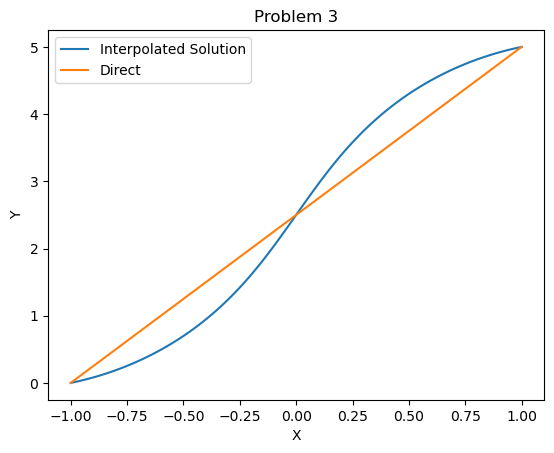

In [80]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D[::-1,::-1], x[::-1]


from scipy.optimize import root
N = 25
D, points = cheb(25)
c = -.7*(points**2 -1)
alpha = (1-c**2)**(-1/2)


def F(Y):
    Y_ = D @ Y
    out = D @ ((alpha)**3 * Y_ * (1 + (alpha * Y_)**2)**(-1/2) - c * alpha**2)
    out[0] = Y[0]
    out[-1] = Y[-1] - 5
    return out

# Do barycentric interpolation
guess = 2.5 * (points + 1)
solution = root(F, guess)
solution = solution.x
x_linspace = np.linspace(-1,1,100)
interp_vals = barycentric_interpolate(points, solution, x_linspace)

# Plot data
plt.plot(x_linspace, interp_vals, label='Interpolated Solution')
plt.plot(x_linspace, 2.5 * (x_linspace + 1), label = "Direct")
plt.title('Problem 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
    
Y_prime = D @ solution
    
    

# Problem 4

Plot the angle at which the boat should be pointed at each $x$-coordinate. (Hint: use Equation 1.1; see Figure 1.3. Note that the angle the boat should be steered is NOT described by the tangent vector to the trjaectory)

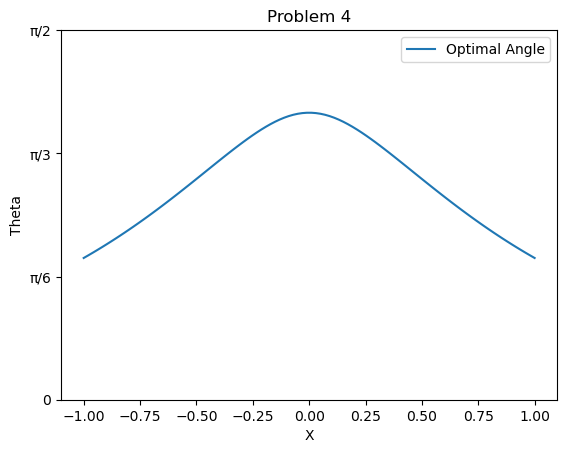

In [85]:
N = 25
D, points = cheb(25)

c = -.7*(points**2 -1)

def G(Y):
    out = (c + np.sin(Y))/(np.cos(Y)) - Y_prime
    return out

# Do barycentric interpolation
guess = np.ones_like(points)
solution = root(G, guess).x
x_linspace = np.linspace(-1,1,100)
interp_vals = barycentric_interpolate(points, solution, x_linspace)

# Plot data
plt.plot(x_linspace, interp_vals, label='Optimal Angle')
plt.title('Problem 4')
plt.xlabel('X')
plt.ylabel('Theta')

# Set custom y-axis ticks
plt.yticks([0, np.pi/6, np.pi/3, np.pi/2], ['0', 'π/6', 'π/3', 'π/2'])

plt.legend()
plt.show()
